## Import Python libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Set parameters and physical values 

In [2]:
nx = 64 # number of computational grids
dx = 0.5e-6 # spacing of computational grid [m]
eee = 5.0e+5 # magnitude of driving force of growth of phase B [J/m3] = [Pa]
sigma = 1.0 # ineterfacial energy [J/m2]
delta = 4.*dx # interfacial thickness [m]
amobi = 4.e-14 # interfacial mobilitiy [m4/(Js)]
ram = 0.1 # paraneter which deternines the interfacial area
bbb = 2.*np.log((1.+(1.-2.*ram))/(1.-(1.-2.*ram)))/2.  # The constant b = 2.1972

## Calculate phase-field parameters ($a, W$ and $M_{\phi}$)

In [3]:
aaa   = np.sqrt(3.*delta*sigma/bbb) # gradient energy coefficient "a" [(J/m)^(1/2)]
www   = 6.*sigma*bbb/delta # potential height W [J/m3]
pmobi = amobi*math.sqrt(2.*www)/(6.*aaa) # mobility of phase-field M_phi [m3/(Js)]

## Set time increment and total number of time steps

In [4]:
dt = dx*dx/(5.*pmobi*aaa*aaa)/2 # time increment for a time step [s]
nsteps = 1000 # total number of time step

## Declare Numpy arrays for phase field variable and others

In [5]:
p  = np.zeros((nx)) # phase-field variable at time t
p_new = np.zeros((nx)) # phase-field variable at time t + dt
driv = np.zeros((nx)) # array for saving driving force term (only for visualization)
grad = np.zeros((nx)) # array for saving gradient force term (only for visualization)

## Set initial distribution of phase-field variable (initial nuclei of phase B)


In [6]:
r_nuclei = 10.*dx # length of the initial B phase
for i in range(0,nx):
        r = i*dx - r_nuclei
        p[i] = 0.5*(1.-np.tanh(np.sqrt(2.*www)/(2.*aaa)*r))

## Solving Allen-Cahn equation and visualization of results



nstep =  0


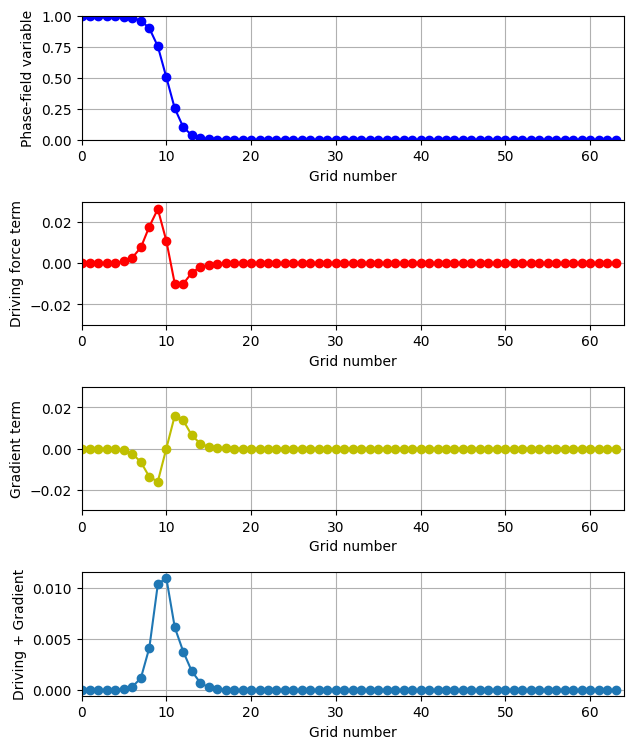

nstep =  100


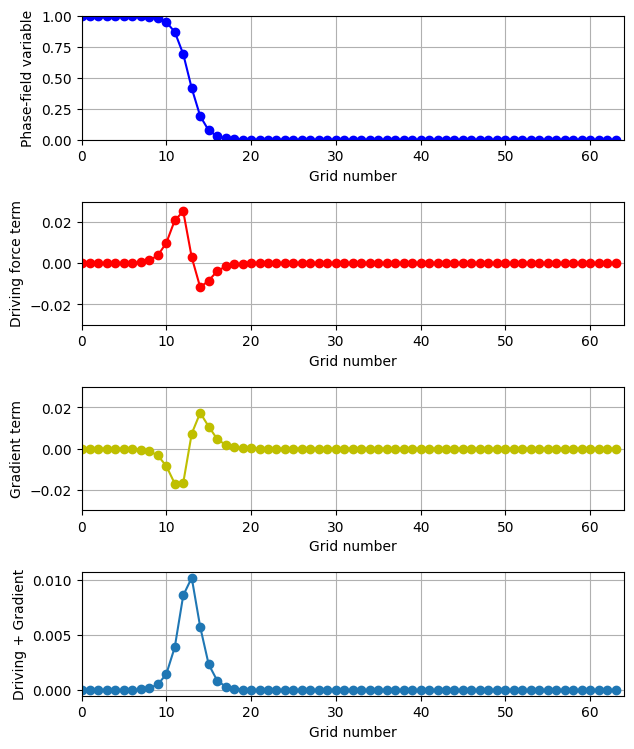

nstep =  200


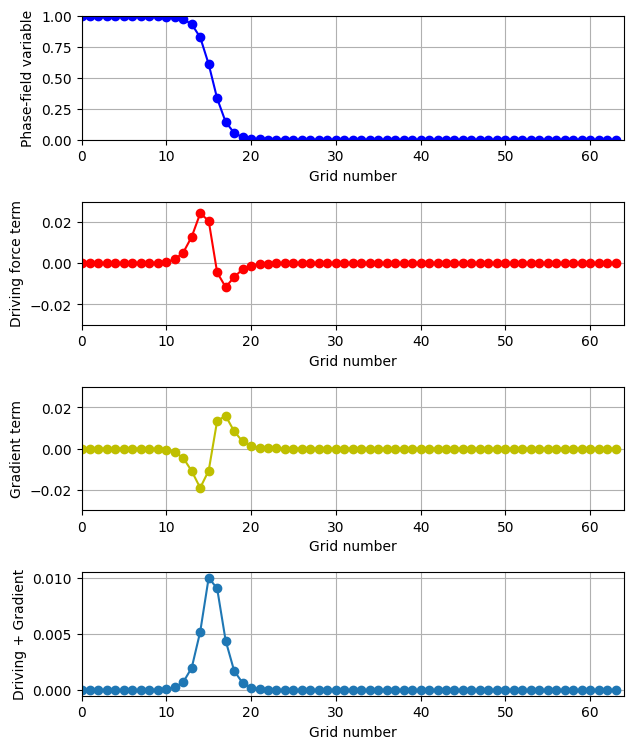

nstep =  300


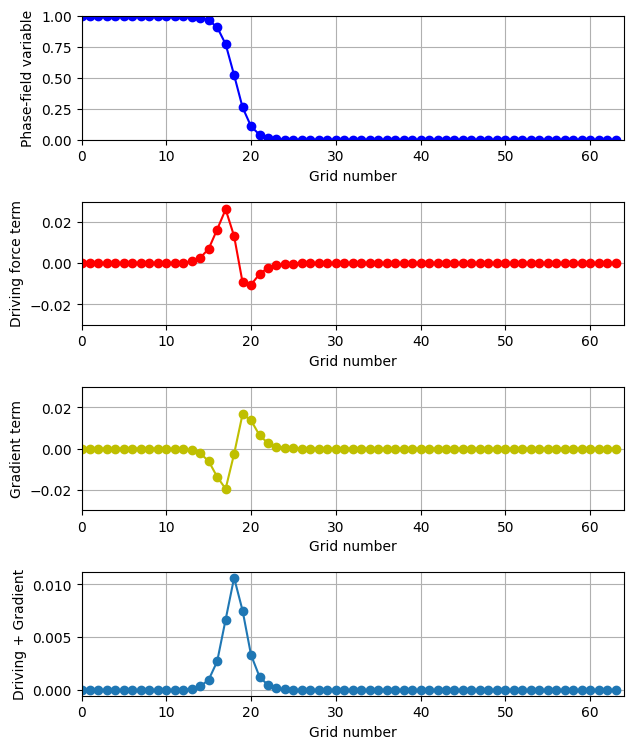

nstep =  400


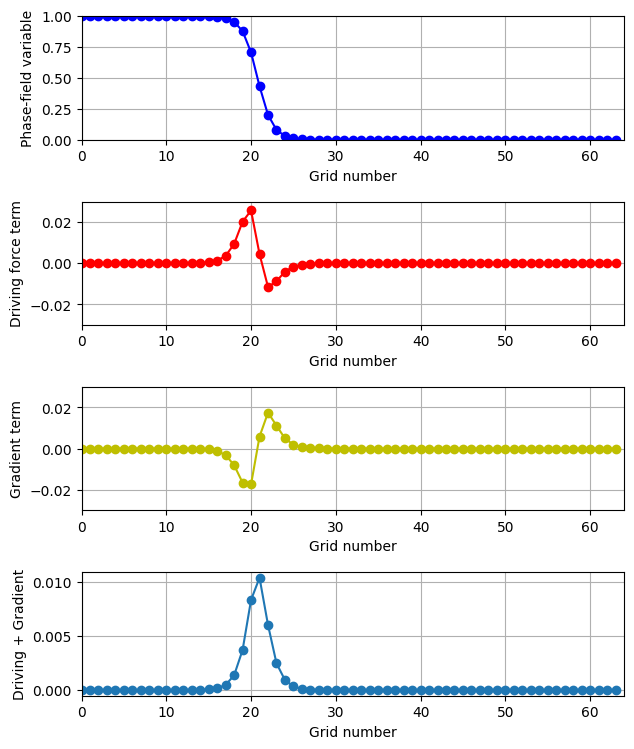

nstep =  500


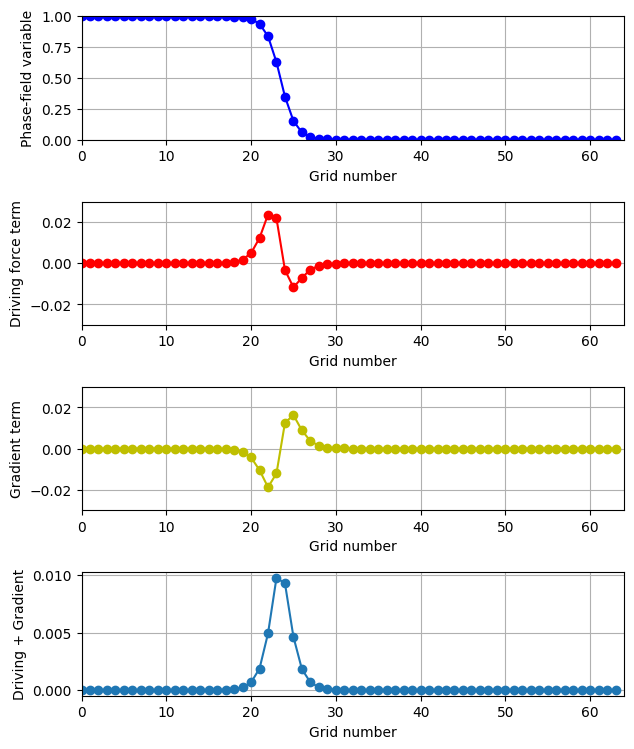

nstep =  600


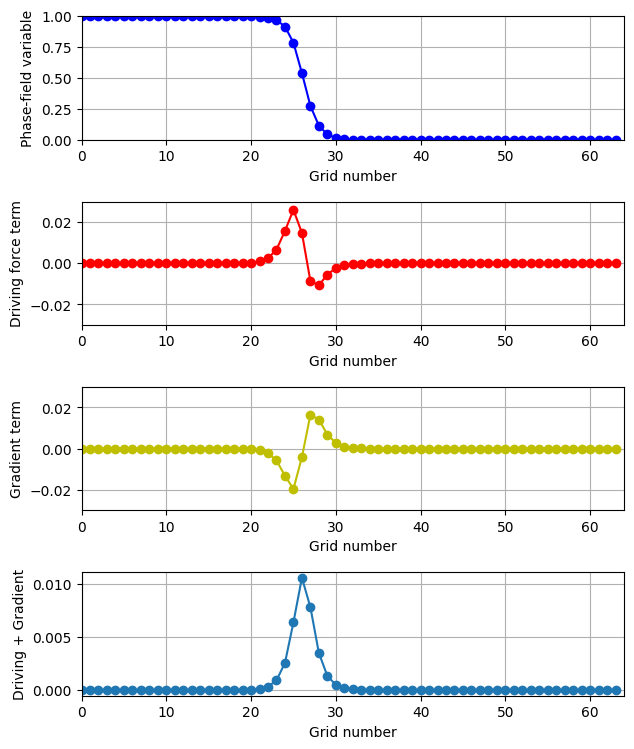

nstep =  700


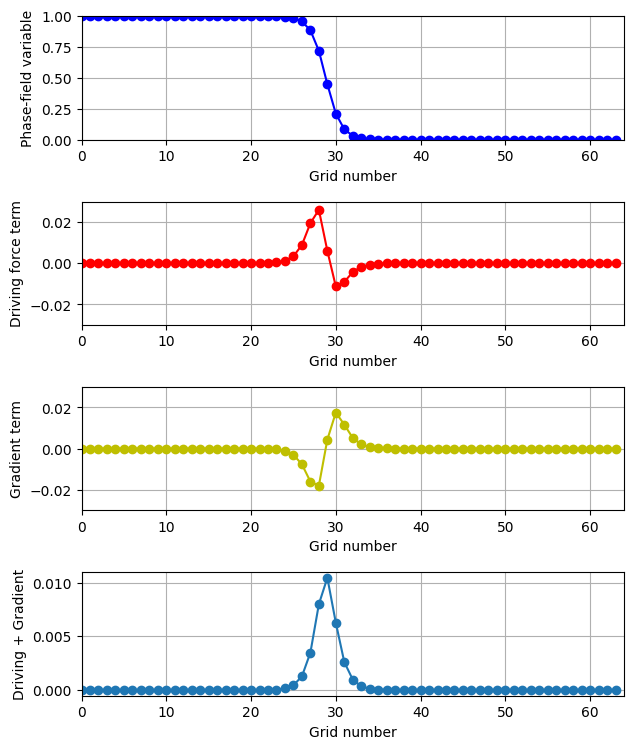

nstep =  800


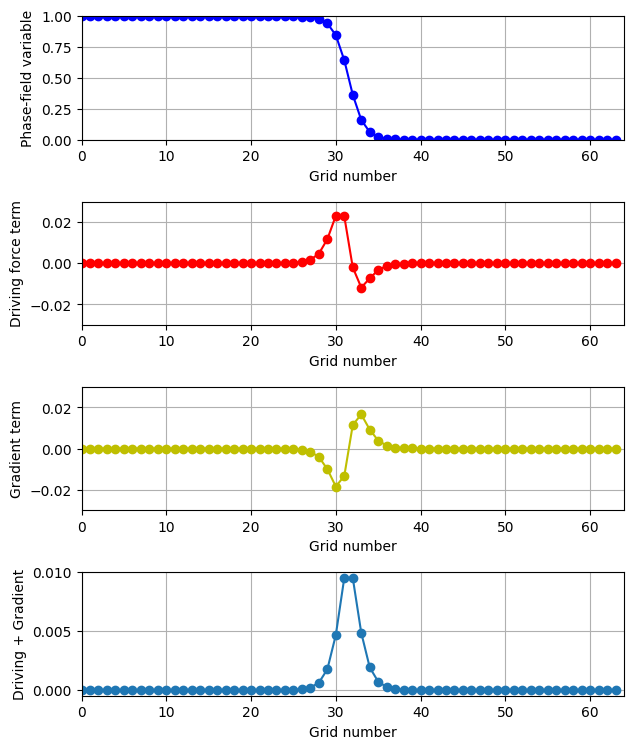

nstep =  900


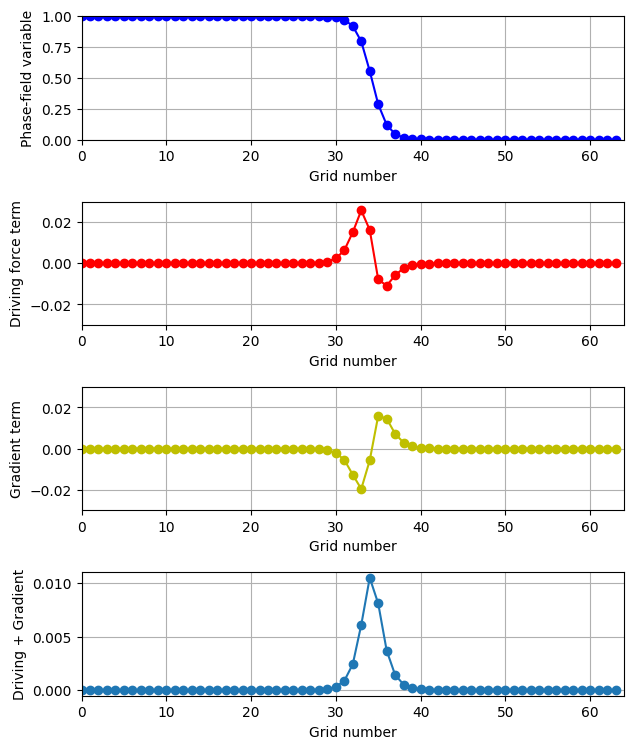

nstep =  1000


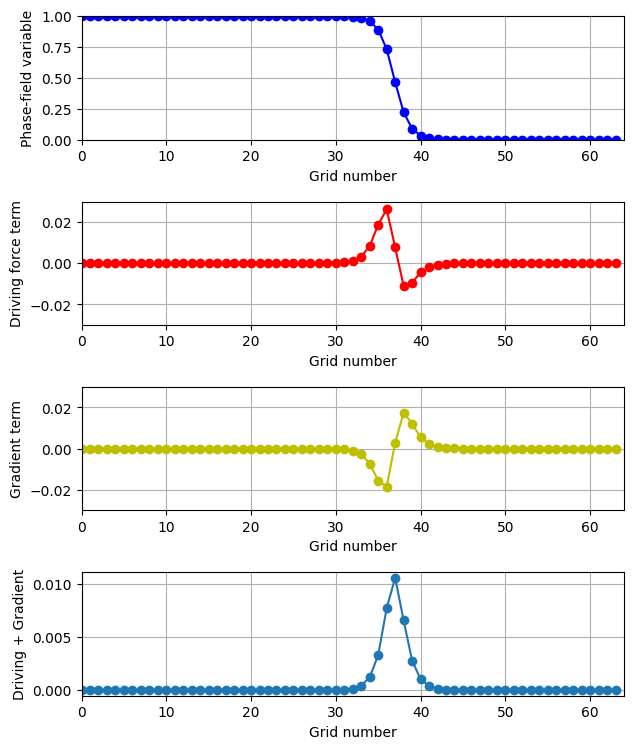

In [7]:
for t in range(nsteps+1):
    for i in range(nx):
        ip = i + 1
        im = i - 1
        if ip > nx - 1:
            ip = nx -1
        if im < 0:
            im = 0
        p_new[i] = p[i] + pmobi * ( 4.*www*p[i]*(1.-p[i])*(p[i]-0.5+3./(2.*www)*eee) +  aaa*aaa*((p[ip] - 2*p[i] + p[im])/dx/dx) ) * dt
        driv[i] = pmobi*(4.*www*p[i]*(1.-p[i])*(p[i]-0.5+3./(2.*www)*eee))
        grad[i] = pmobi*(aaa*aaa*(p[ip] - 2*p[i] + p[im])/dx/dx)
    p = p_new
    
    if t%100 == 0: 
        print('nstep = ', t)
        fig = plt.figure(figsize=(7,9))
        fig.set_dpi(100)
        plt.subplots_adjust(hspace=0.5)
        plt.subplot(4, 1, 1)
        plt.ylim([0,1])
        plt.xlim([0,nx])
        plt.xlabel('Grid number')
        plt.ylabel('Phase-field variable')
        plt.grid(True)
        plt.plot(p[:],color="b",marker="o")
        plt.subplot(4, 1, 2)
        plt.ylim([-0.03,0.03])
        plt.xlim([0,nx])
        plt.xlabel('Grid number')
        plt.ylabel('Driving force term')
        plt.grid(True)
        plt.plot(driv[:],color="r",marker="o")
        plt.subplot(4, 1, 3)
        plt.ylim([-0.03,0.03])
        plt.xlim([0,nx])
        plt.xlabel('Grid number')
        plt.ylabel('Gradient term')
        plt.grid(True)
        plt.plot(grad[:],color="y",marker="o")
        plt.subplot(4, 1, 4)
        plt.xlim([0,nx])
        plt.xlabel('Grid number')
        plt.ylabel('Driving + Gradient')
        plt.grid(True)
        plt.plot(grad[:]+driv[:],marker="o")
        plt.show()